In [ ]:
if (!require(dplyr)) install.packages("dplyr")
library(dplyr)
if (!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)
if (!require(tidyverse)) install.packages("tidyverse")
library(tidyverse)
if (!require(usmap)) install.packages("usmap")
library(usmap)
if (!require(reshape2)) install.packages("reshape2")
library(reshape2)


# Workplace Discrimination in Corporate America

In order to understand workplace discrimination in corporate America today, we analyzed 13 years of Equal Employment Opportunity Commission (EEOC)’s Charge Receipts by State data. To do a contextual analysis of the number of complaints filed in each state, we combined state population data from the US Census Bureau to get the number of charges received by EEOC per 100,000 people. We read this combined data into the dataframe `states_df`.

In [ ]:
states_df = read.csv('States_Complaints_Reg_Standard.csv')
head(states_df)

,Year,State,Region,Population,Total_Charges,Percentage_of_US_Total_Charges,Race,Percentage_of_US_Race_Charges,Sex,Percentage_of_US_Sex_Charges,⋯,Retaliation_Title_VII,Percentage_of_US_Retaliation_Title_VII_Charges,Age,Percentage_of_US_Age_Charges,Disability,Percentage_of_US_Disability_Charges,Equal_Pay_Act,Percentage_of_US_EPA_Charges,GINA,Percentage_of_US_GINA_Charges
,<int>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>,⋯,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>
1,2009,Alabama,Southeast,4757938,3345,3.60%,1745,5.20%,1004,3.60%,⋯,1006,3.50%,658,2.90%,588,2.70%,55,5.80%,0,0.00%
2,2010,Alabama,Southeast,4785437,3493,3.50%,1831,5.10%,1006,3.50%,⋯,1129,3.60%,643,2.80%,686,2.70%,42,4.00%,12,6.00%
3,2011,Alabama,Southeast,4799069,3154,3.20%,1626,4.60%,934,3.30%,⋯,959,3.10%,579,2.50%,638,2.50%,45,4.90%,9,3.70%
4,2012,Alabama,Southeast,4815588,3246,3.30%,1611,4.80%,1086,3.60%,⋯,1111,3.60%,619,2.70%,677,2.60%,57,5.30%,17,6.10%
5,2013,Alabama,Southeast,4830081,3105,3.30%,1520,4.60%,976,3.50%,⋯,1132,3.60%,579,2.70%,683,2.60%,108,10.60%,61,18.30%
6,2014,Alabama,Southeast,4841799,2879,3.20%,1466,4.70%,902,3.50%,⋯,1101,3.60%,563,2.70%,680,2.70%,112,11.90%,68,20.40%


# Exploratory Data Analysis
## Aggregating Reports by State
First, we would like to see if there are any noteable states, that have high rates of reports. To do this, we wil take the average number of charges over our given time period for each state. In order to account for states with higher/lower populations, we will divide the total charges by the population, and multiply by 100,000 to get the number of charges per 100,000 people.

In [ ]:
# group by state, find the average of all numerical columns
agg_states_df = states_df%>%
    group_by(State)%>%
    dplyr::select_if(is.numeric)%>%
     summarise(across(everything(), mean))

# divide everything by the population and multiply by 100,000 
disc_df = agg_states_df[,4:15]
decimal_states_df = disc_df/agg_states_df$Population*100000
decimal_states_df$state = agg_states_df$State
head(decimal_states_df)

,Total_Charges,Race,Sex,National_Origin,Religion,Color,Retaliation_All,Retaliation_Title_VII,Age,Disability,Equal_Pay_Act,GINA,state
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,56.43751,28.165812,17.714656,2.101926,1.5298230,1.5377250,22.489031,20.257512,10.406906,12.301800,0.9656218,0.37771457,Alabama
2,11.63580,3.402815,3.928081,1.324586,0.6166174,0.5823609,5.104222,3.802474,3.471328,3.791055,0.6280363,0.04567537,Alaska
3,32.71657,7.521917,10.175586,4.560887,1.4760116,0.8320157,15.364707,11.257544,7.834908,10.770044,0.4525985,0.07881069,Arizona
4,49.05270,20.795035,16.187132,2.156560,1.3678903,1.0369074,15.543267,12.939363,8.936538,13.117783,0.6076639,0.05688769,Arkansas
5,15.09048,4.962153,4.195695,2.589859,0.7042966,0.6100584,7.200163,5.571813,3.855003,4.728450,0.1755263,0.04861340,California
6,31.98188,8.389295,11.065312,5.675028,2.0002843,2.3643588,16.466930,12.493277,8.951697,10.473160,0.5609863,0.07083160,Colorado


### Map of Reports by Report Type
Here we use the `plot_usmap` package to create a heatmap of the number of cases per state. It is interesting to note that New York seems to have a lot of cases for each of report types. We will want to explore this farther in the next section. 

It is also interesting to note that North Carolina seems to have a lot of cases for some activity, while not a lot of cases for others. This is something we also want to keep exploring.

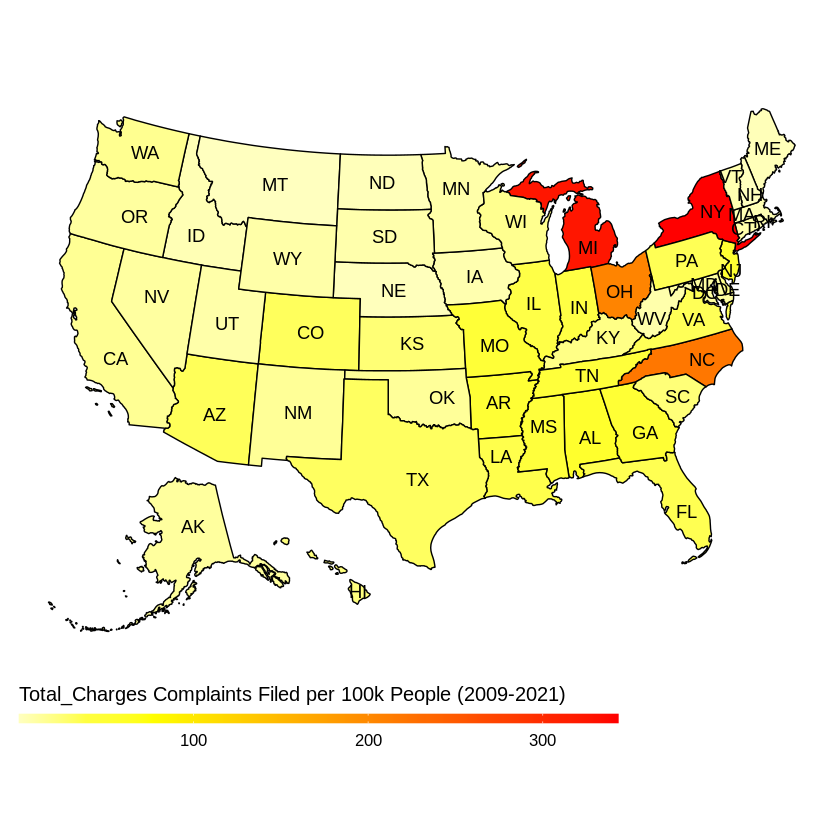

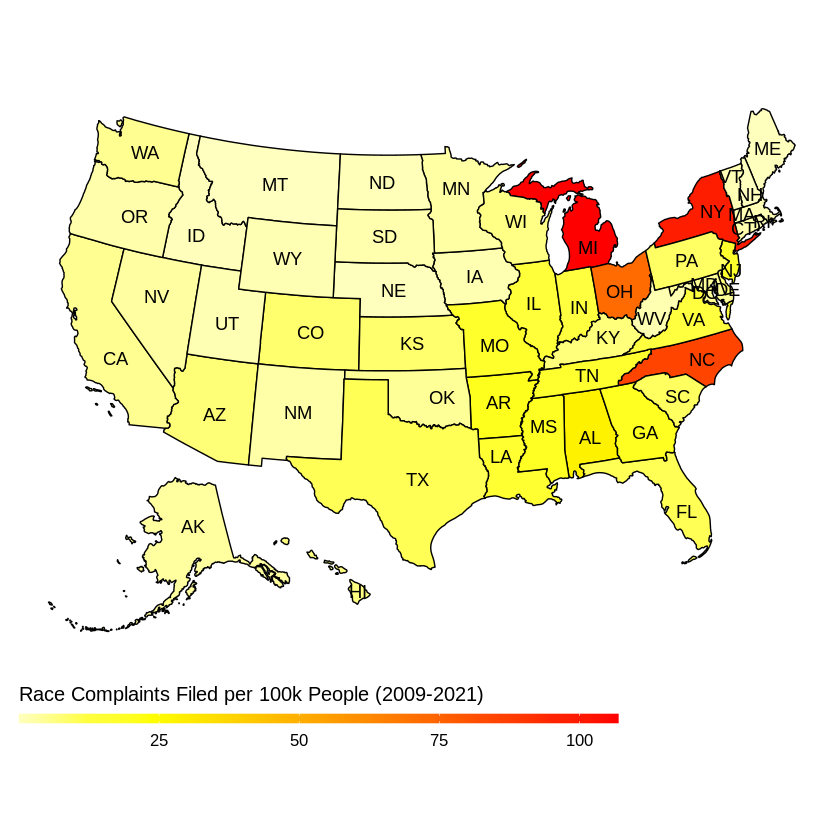

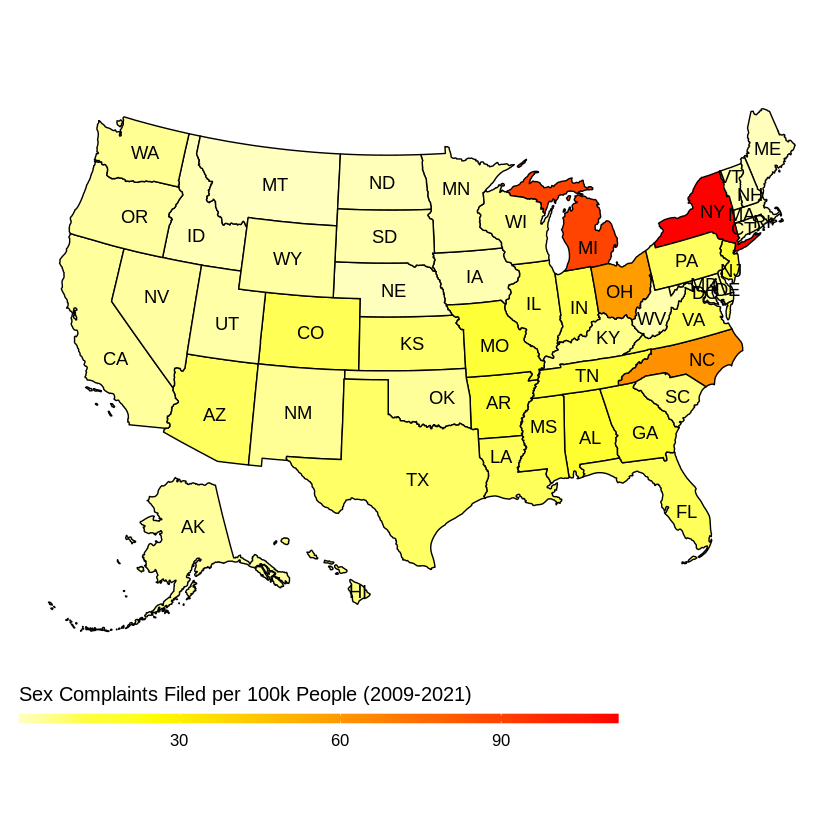

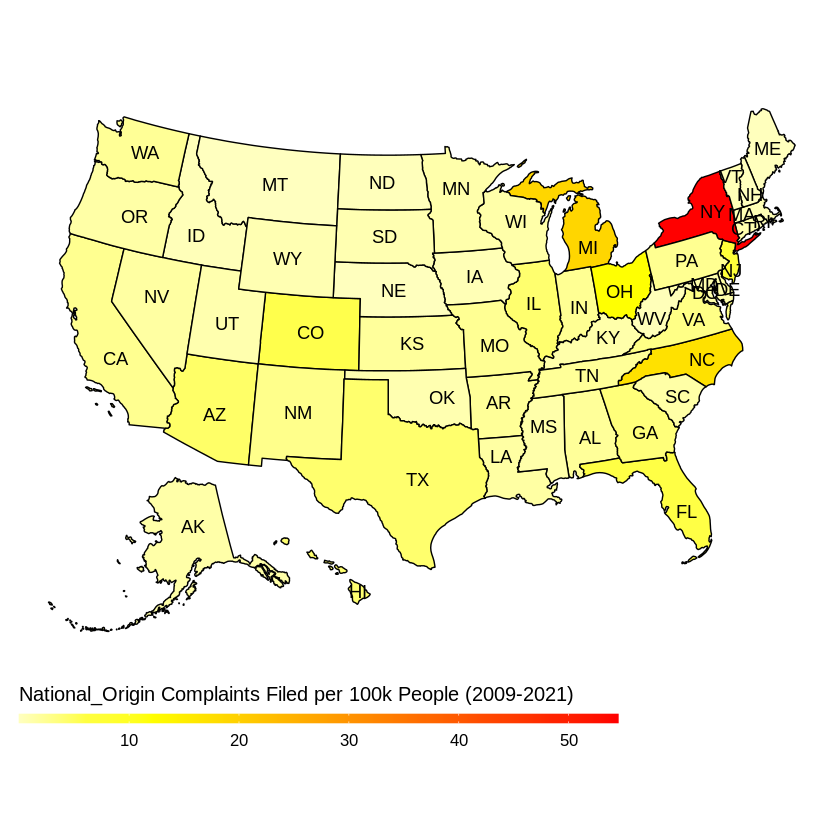

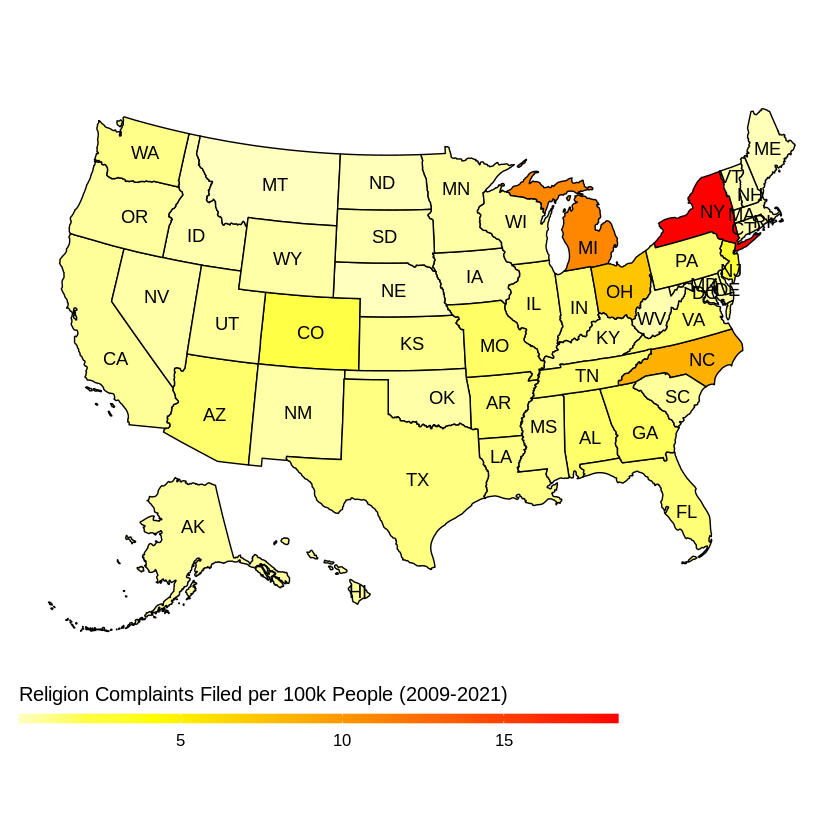

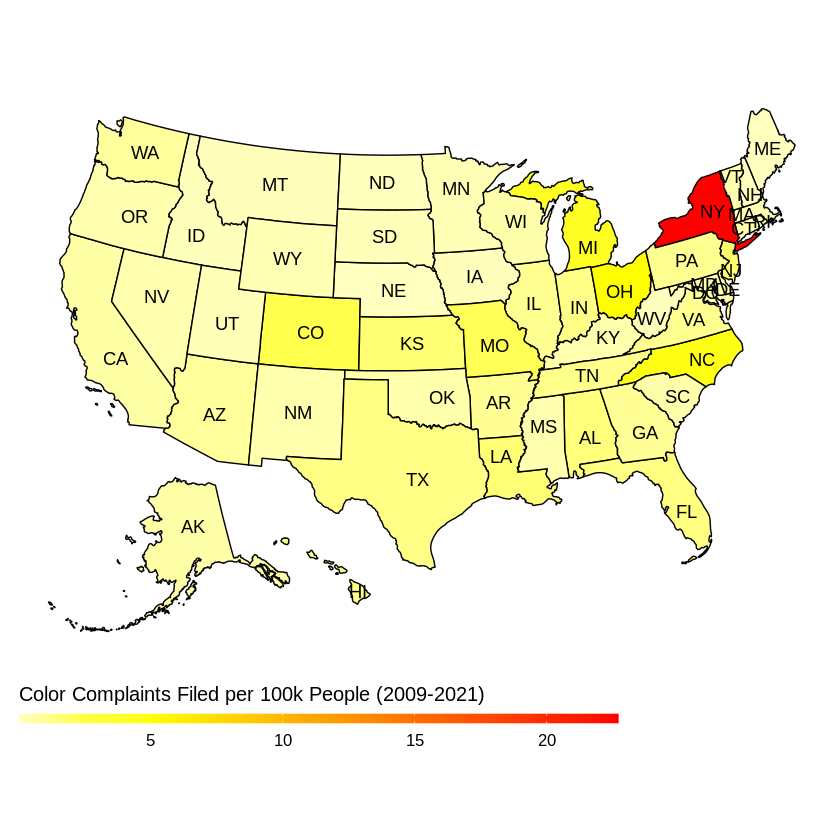

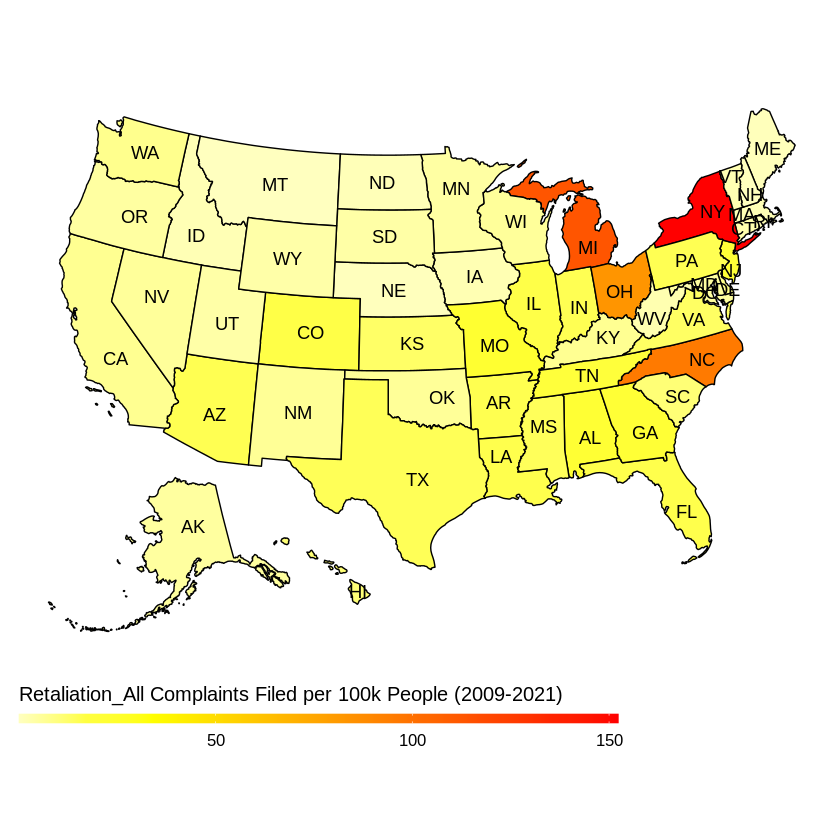

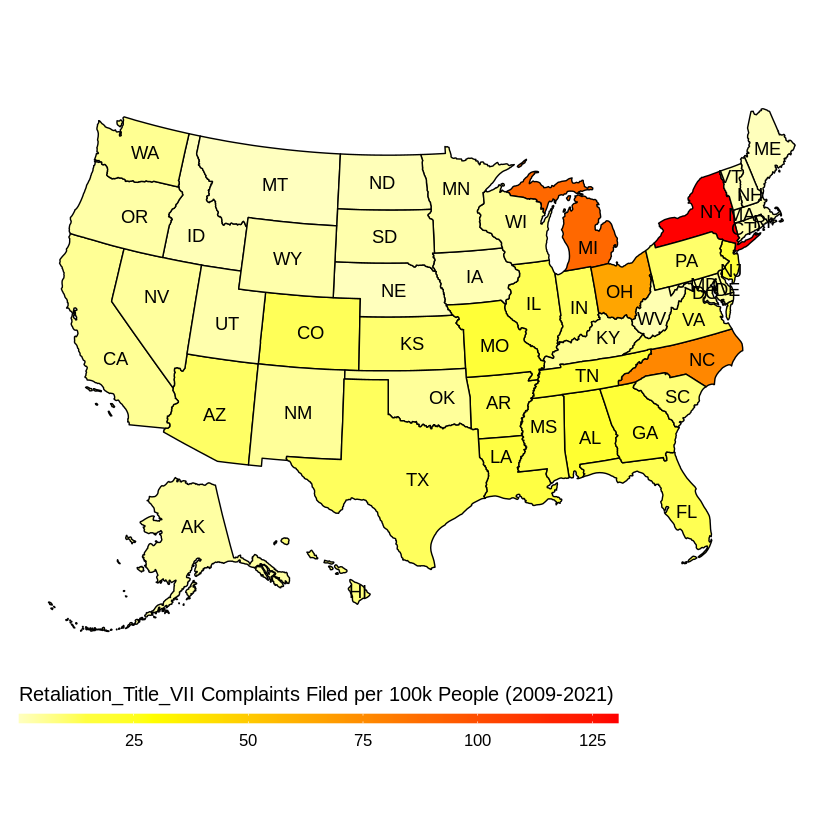

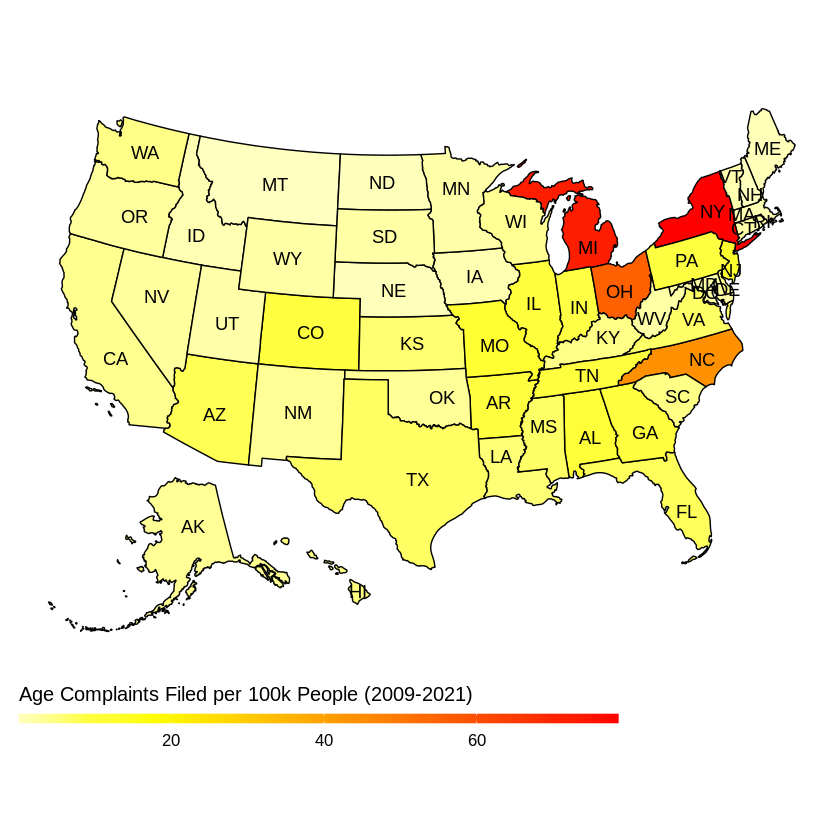

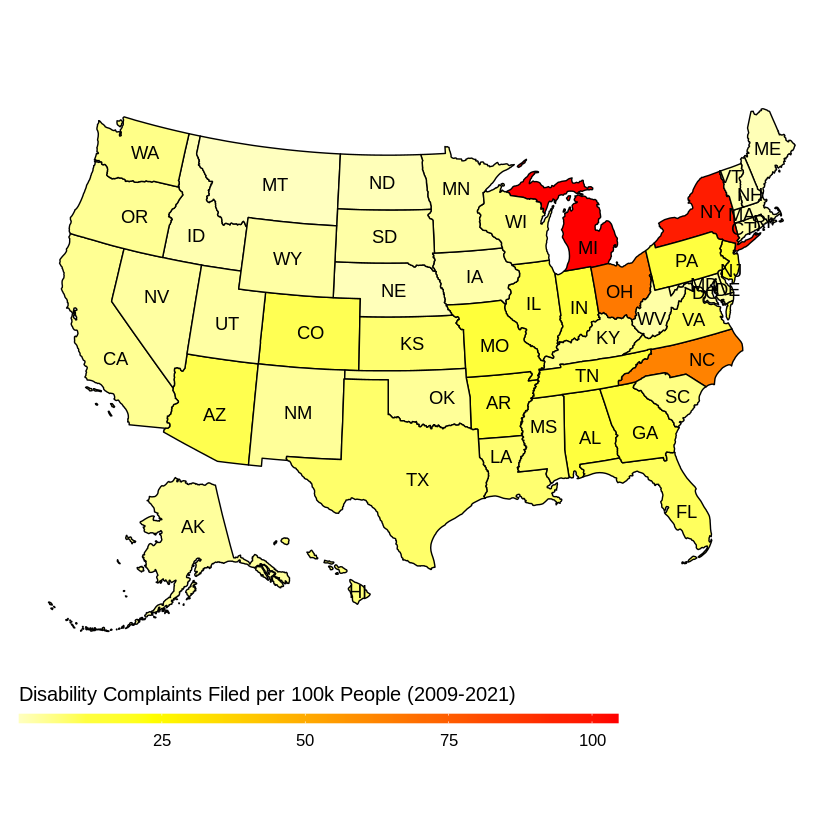

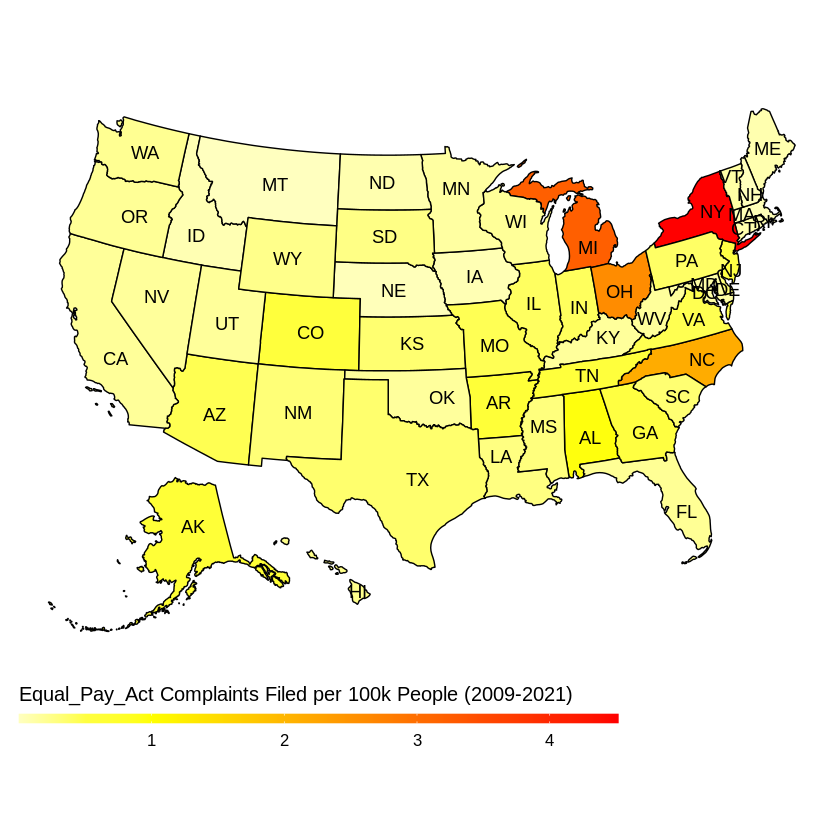

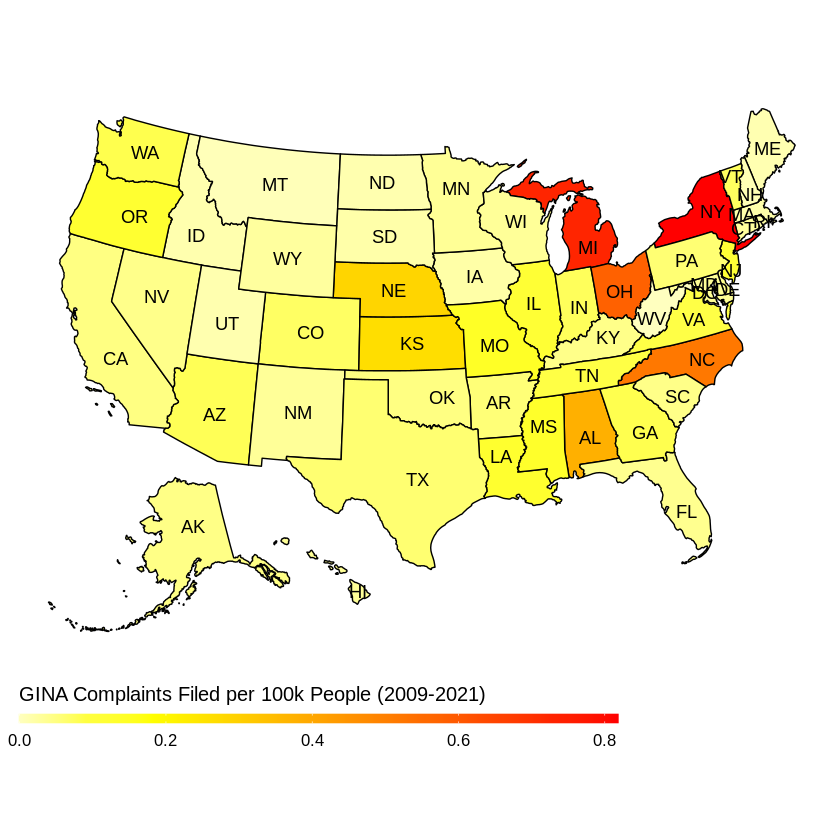

In [ ]:
for (col_name in colnames(decimal_states_df)[1:12]){
  print(plot_usmap(data = decimal_states_df, values = col_name, labels = TRUE) +
    labs(fill = paste(col_name,'Complaints Filed per 100k People (2009-2021)')) + 
    scale_fill_gradientn(colours=rev(heat.colors(10)),na.value="grey90",
    guide = guide_colourbar(barwidth = 25, barheight = 0.4,
    #put legend title on top of legend
    title.position = "top")) +  # put legend at the bottom, adjust legend title and text font sizes
    theme(legend.position = "bottom",
          legend.title=element_text(size=12), 
          legend.text=element_text(size=10))
  )
}


### Bar Chart of Most/Least number of Complaints
Visualizing the top 5 and bottom 5 states with the most and least number of complaints filed per 100,000 residents.

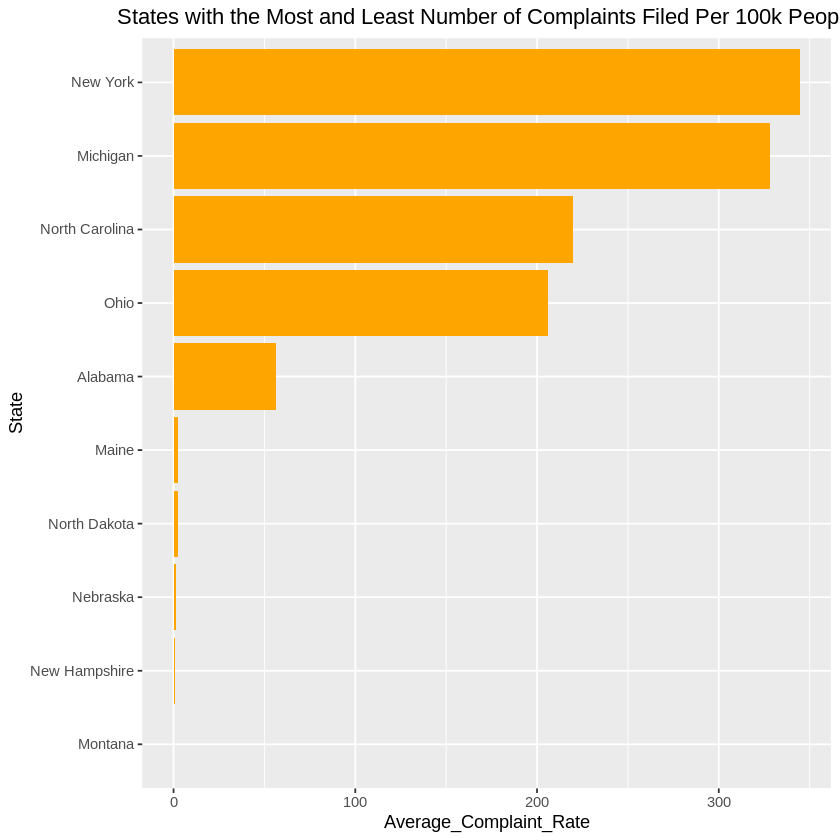

In [ ]:
states_df$Complaint_Rate <- (states_df$Total_Charges/states_df$Population)*100000
#Averaging the rate of discrimination complaints filed in each state over the years
rate_df <- states_df %>% group_by(State) %>% summarise(Average_Complaint_Rate = mean(Complaint_Rate))

#Getting the top 5 states with the highest number of complaints filed
top_5 <- rate_df %>%                                      
  arrange(desc(Average_Complaint_Rate)) %>% 
  slice(1:5)

#Getting the bottom 5 states with the least number of complaints filed
bottom_5 <- rate_df %>%                                      
  arrange(Average_Complaint_Rate) %>% 
  slice(1:5)

#Combining the two dataframes for a bar plot
top_bottom <- rbind(top_5, bottom_5)
top_bottom <- top_bottom %>%
  arrange(desc(Average_Complaint_Rate))

#Plotting the top and bottom 5 states with the most and least number of complaints filed

top_bottom %>%
  arrange(Average_Complaint_Rate) %>%
  mutate(State = factor(State, levels = unique(State))) %>% 
  ggplot(aes(x = State, y = Average_Complaint_Rate)) + ggtitle("States with the Most and Least Number of Complaints Filed Per 100k People")+
  theme(plot.title = element_text(hjust = 0.5))+
  geom_bar(stat = "identity", fill="orange1") +
  coord_flip()

## Discrimination Complaints by State


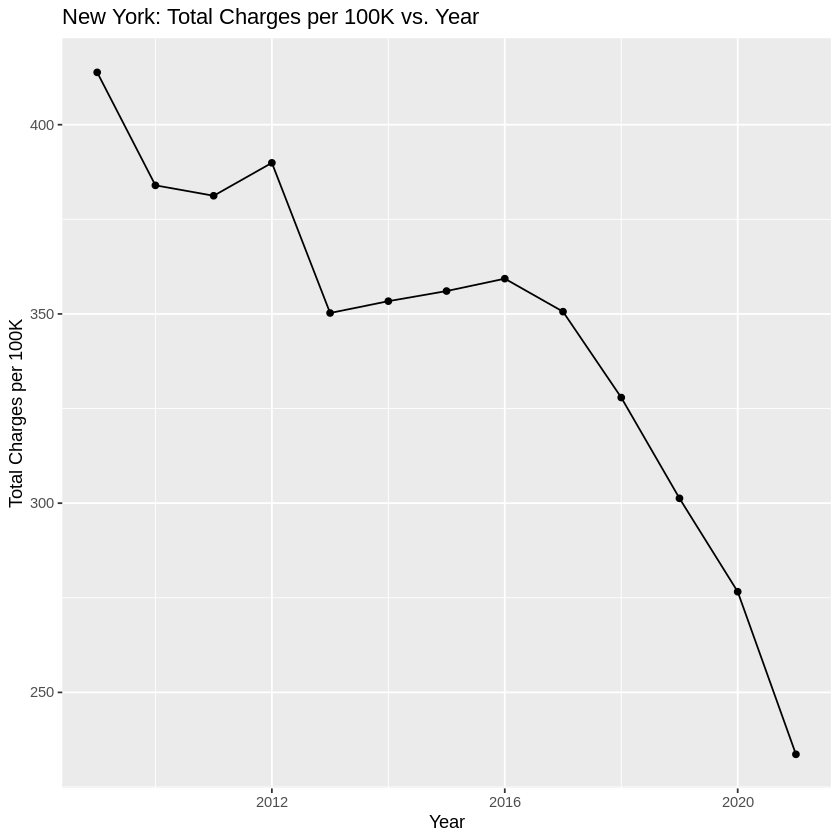

In [ ]:
p = ggplot(data=states_df%>%
    filter(State=="New York"),
    aes(x=Year, y=Total_Charges/Population*100000)) +
    geom_line()+
    geom_point()
p + ggtitle("New York: Total Charges per 100K vs. Year") +
  xlab("Year") + ylab("Total Charges per 100K")

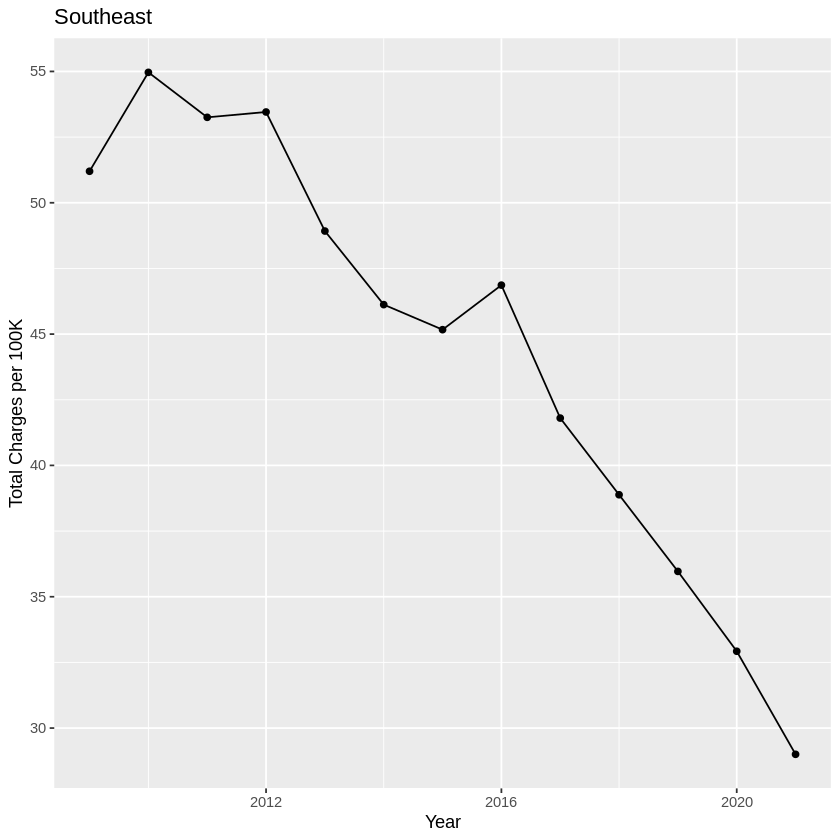

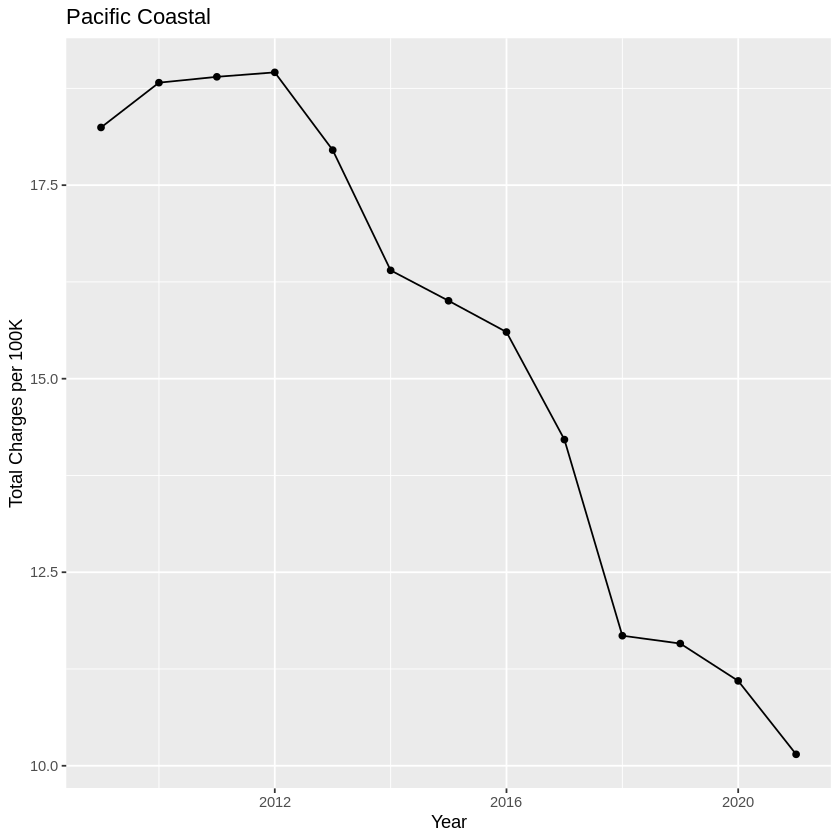

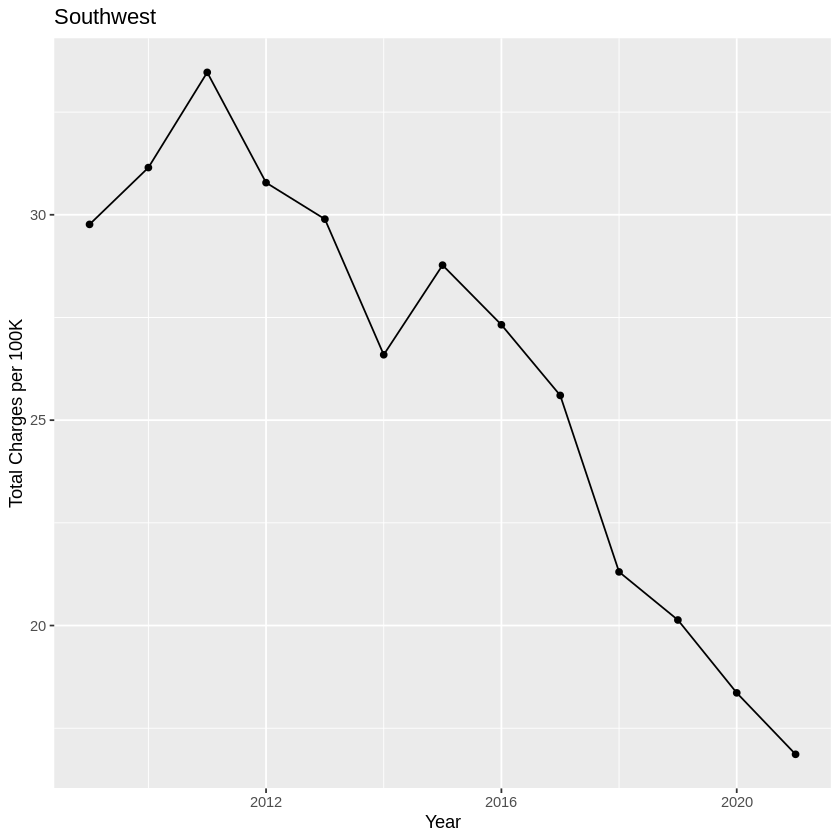

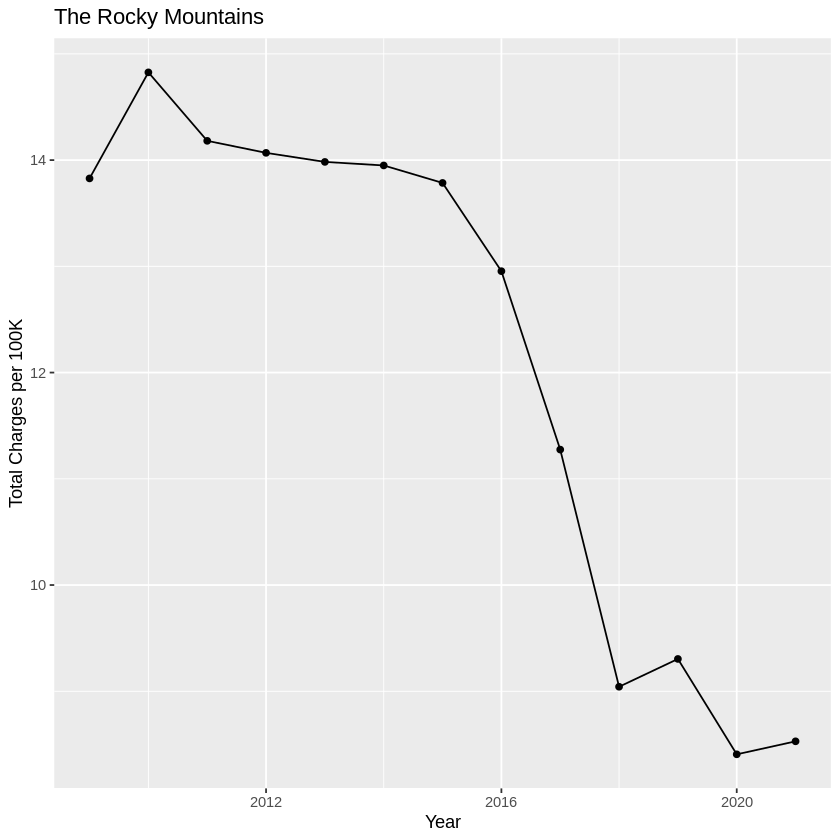

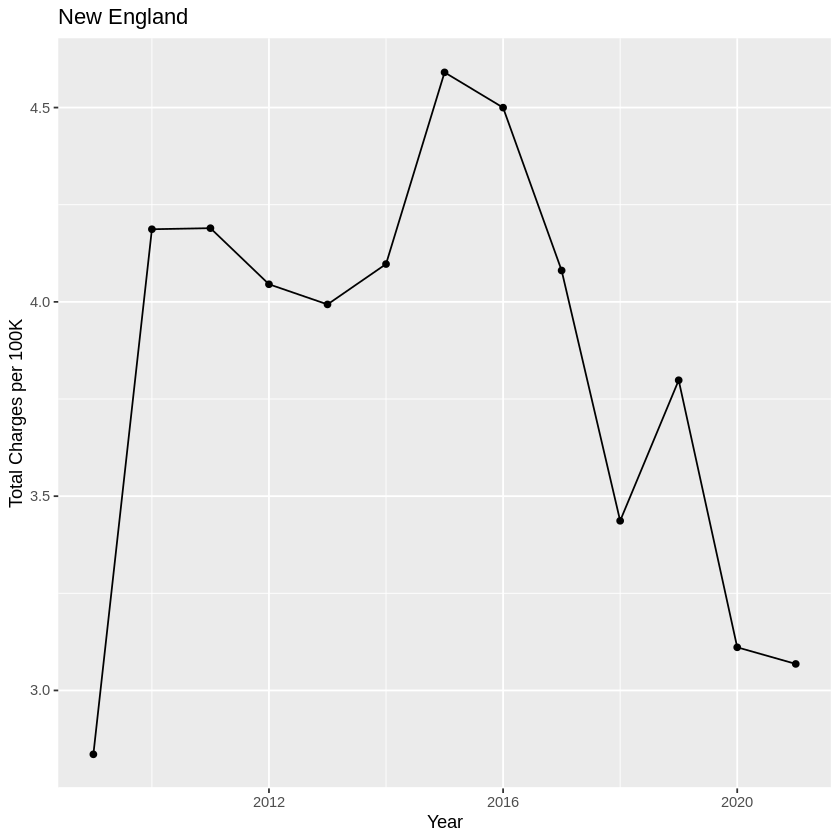

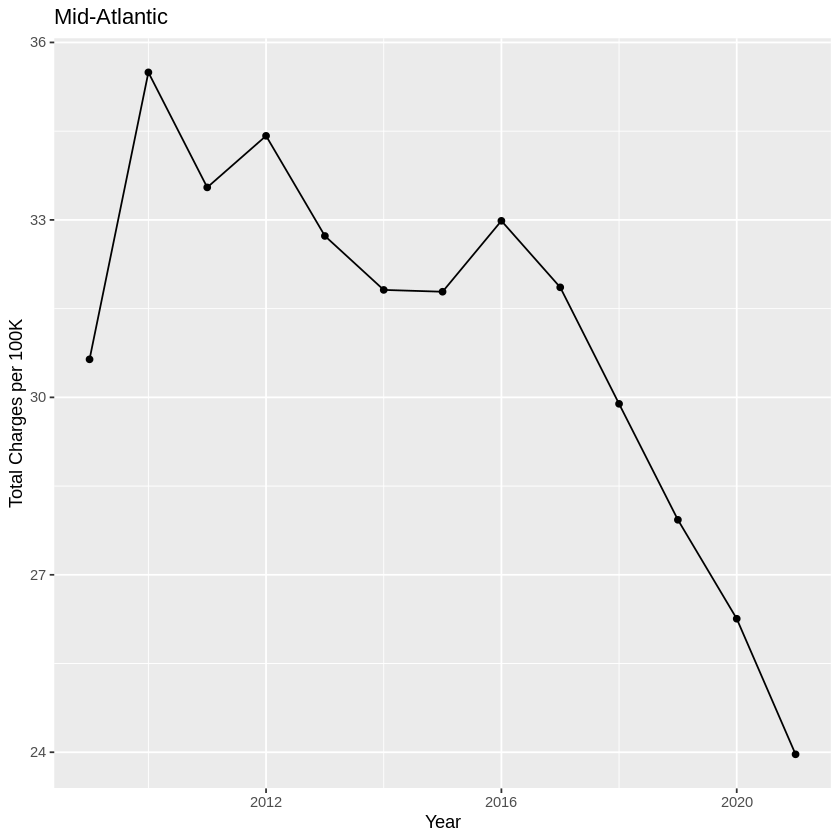

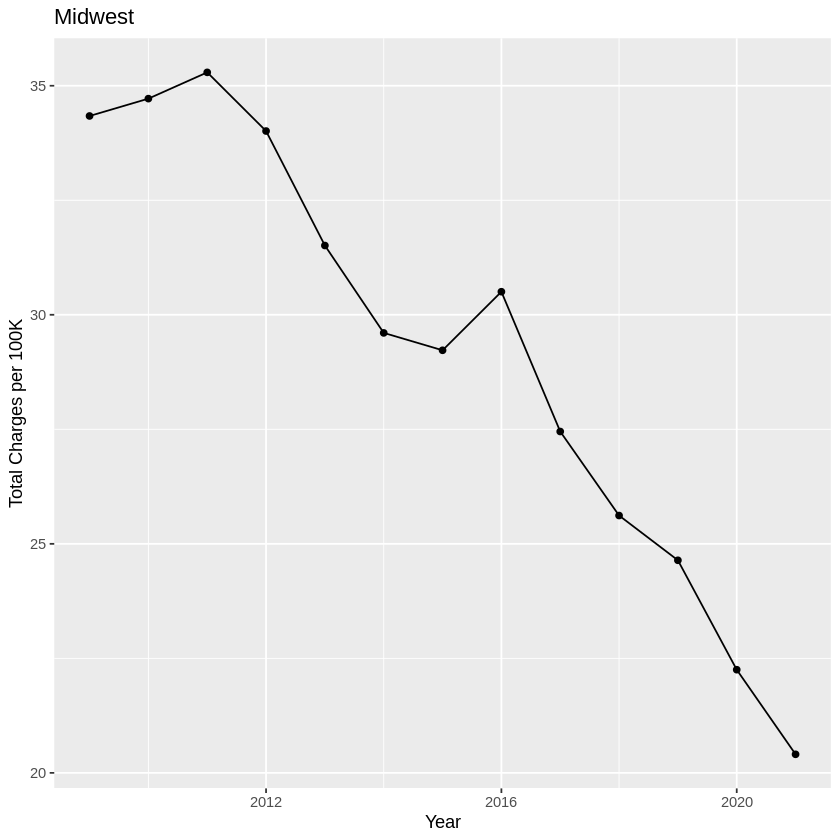

In [ ]:
list_of_regions = unique(states_df$Region)

for(n in 1:7){
  region = list_of_regions[n]
print(ggplot(data=states_df%>%
    filter(Region==region)%>%
    group_by(Year)%>%
    dplyr::select_if(is.numeric)%>%
    summarise(across(everything(), mean)), aes(x=Year, y=Total_Charges/Population*100000)) +
  geom_line()+
  geom_point()+ggtitle(region)+xlab("Year") + ylab("Total Charges per 100K"))
}


## Demographic Data

To understand how demographics of a region impact the total number of workplace discrimination complaints filed, we combined Bridged-Race Postcensal
Population Estimates from the  National Center for Health Statistics (NCHS) to our existing data. We also incorporated party affiliation information of the state governor for each year from National Governors Association. This consolidated data is stored in "State_Complaint_Demo_Gov_T.csv" which we read into a dataframe for analysis.

In [ ]:
st_demo_df <-read.csv("State_Complaint_Demo_Gov_T.csv")
head(st_demo_df)

,Year,State,State_Population,Total_Charges,Gov_Party,White_Male_Pop,White_Female_Pop,Black_Male_Pop,Black_Female_Pop,Native_American_Male_Pop,Native_American_Female_Pop,Asian_Male_Pop,Asian_Female_Pop,Hispanic_Male_Pop,Hispanic_Female_Pop
,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2010,Alabama,4785437,3493,R,1586707,1657199,590195,676930,13957,14460,28422,31550,88696,70303
2,2011,Alabama,4799069,3154,R,1587864,1657790,593083,680873,14015,14517,29285,32887,89426,72962
3,2012,Alabama,4815588,3246,R,1589395,1659102,598011,685594,14074,14605,31058,34904,88800,74000
4,2013,Alabama,4830081,3105,R,1589733,1659143,603103,690064,14112,14694,32194,36455,89170,75676
5,2014,Alabama,4841799,2879,R,1589654,1659436,606338,694059,14251,14817,33146,37676,89763,77193
6,2015,Alabama,4852347,2802,R,1587903,1658295,610070,697861,14347,14898,34310,38998,91036,79033


We would like to normalize the data by dividing each subgroup by the total population. Similarly we will divide each case type by the population. Joing these two dataframes together by "State" we have our final dataset `state_agg_df` which we are then able to make a coorrelation matrix.

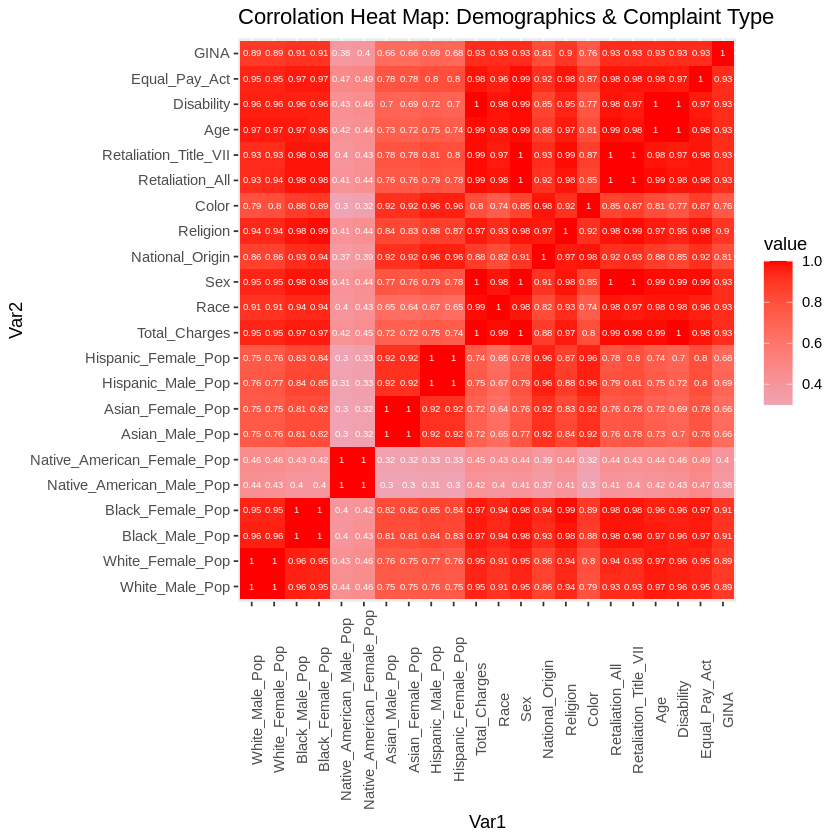

In [ ]:
# normalizing demographic data
st_demo_normalized_df = st_demo_df[6:ncol(st_demo_df)]/st_demo_df$State_Population
st_demo_normalized_df$State = st_demo_df$State

# normalizing state data
agg_states_normalized_df = agg_states_df[4:ncol(agg_states_df)]/agg_states_df$Population*100000
agg_states_normalized_df$State = agg_states_df$State

agg_demo_df = st_demo_normalized_df%>%
    group_by(State)%>%
    dplyr::select_if(is.numeric)%>%
    summarise(across(everything(), mean))

# joining case and demographic data on state
state_agg_df = merge(agg_demo_df,agg_states_normalized_df,by="State")

# creating correlation matrix
cormat <-round(cor(state_agg_df[,2:ncol(state_agg_df)]),2)
melted_cormat <- melt(cormat)

ggplot(data = melted_cormat, aes(x=Var1, y=Var2,
                                   fill=value)) +
geom_tile() +  scale_fill_gradient2(low = "#075AFF",
                       mid = "#cccfff",
                       high = "#FF0000")+
geom_text(aes(Var2, Var1, label = value),
          color = "#fffdfd", size = 2)+ theme(axis.text.x = element_text(angle = 90))+ggtitle("Corrolation Heat Map: Demographics & Complaint Type")



# Models

To get a high-level understanding of how the demographics, leading party affiliations and population of a state affect discrimination complaints filed with the EEOC, we build a linear regression model with Total_Charges as a function of Year, State, State_Population, Gov_Party and population estimates of White, Black, Native American, Asian and Hispanic male and female for a given year.

In [ ]:
model1<-lm(Total_Charges ~ Year + State + Gov_Party + State_Population + White_Male_Pop +
           White_Female_Pop + Black_Male_Pop + Black_Female_Pop + Native_American_Male_Pop + 
           Native_American_Female_Pop + Asian_Male_Pop + Asian_Female_Pop + Hispanic_Male_Pop +	Hispanic_Female_Pop, data= st_demo_df)
summary(model1)


Call:
lm(formula = Total_Charges ~ Year + State + Gov_Party + State_Population + 
    White_Male_Pop + White_Female_Pop + Black_Male_Pop + Black_Female_Pop + 
    Native_American_Male_Pop + Native_American_Female_Pop + Asian_Male_Pop + 
    Asian_Female_Pop + Hispanic_Male_Pop + Hispanic_Female_Pop, 
    data = st_demo_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-970.66  -90.49   -4.90   98.00  921.60 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 5.357e+04  9.068e+03   5.907 6.55e-09 ***
Year                       -2.540e+01  4.591e+00  -5.534 5.13e-08 ***
StateAlaska                -3.029e+03  1.049e+03  -2.887 0.004067 ** 
StateArizona                1.366e+03  1.590e+03   0.859 0.390798    
StateArkansas              -1.729e+03  3.378e+02  -5.117 4.47e-07 ***
StateCalifornia             4.254e+03  2.710e+03   1.570 0.117123    
StateColorado              -3.653e+03  5.552e+02  -6.579 1.23e-10 ***
State

We see from the above model that the population estimates of White, Native American, Asian and Hispanic residents of a state are statistically significant in explaining the number of complaints filed with the EEOC. However, the state governor's party affiliation does not seem to add any value in explaining the response.

We keep the demographic factors in explaining our response and explore other factors which may have an impact on the number of complaints filed. From the US Bureau of Economic Analysis, we pull each state's per capita income for a given year and combine with our dataset.

In [ ]:
st_demo_income <- read.csv("State_Complaints_Demo_Income_Gov.csv")
head(st_demo_income)

,Year,State,State_Population,State_Per_Capita_Income,Total_Charges,Percentage_of_US_Total_Charges,Race,Percentage_of_US_Race_Charges,Sex,Percentage_of_US_Sex_Charges,⋯,White_Male_Pop,White_Female_Pop,Black_Male_Pop,Black_Female_Pop,Native_American_Male_Pop,Native_American_Female_Pop,Asian_Male_Pop,Asian_Female_Pop,Hispanic_Male_Pop,Hispanic_Female_Pop
,<int>,<chr>,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2010,Alabama,4785437,33946,3493,3.50%,1831,5.10%,1006,3.50%,⋯,1586707,1657199,590195,676930,13957,14460,28422,31550,88696,70303
2,2011,Alabama,4799069,35010,3154,3.20%,1626,4.60%,934,3.30%,⋯,1587864,1657790,593083,680873,14015,14517,29285,32887,89426,72962
3,2012,Alabama,4815588,35824,3246,3.30%,1611,4.80%,1086,3.60%,⋯,1589395,1659102,598011,685594,14074,14605,31058,34904,88800,74000
4,2013,Alabama,4830081,36014,3105,3.30%,1520,4.60%,976,3.50%,⋯,1589733,1659143,603103,690064,14112,14694,32194,36455,89170,75676
5,2014,Alabama,4841799,37055,2879,3.20%,1466,4.70%,902,3.50%,⋯,1589654,1659436,606338,694059,14251,14817,33146,37676,89763,77193
6,2015,Alabama,4852347,38531,2802,3.20%,1389,4.50%,864,3.30%,⋯,1587903,1658295,610070,697861,14347,14898,34310,38998,91036,79033


We build another linear regression model, using state per capita income as an additional explanatory variable.

In [ ]:
model2 <-lm(Total_Charges ~ Year + State + State_Population + State_Per_Capita_Income + White_Male_Pop 
            + White_Female_Pop + Black_Male_Pop + Black_Female_Pop + Native_American_Male_Pop
            + Native_American_Female_Pop + Asian_Male_Pop + Asian_Female_Pop
            + Hispanic_Male_Pop + Hispanic_Female_Pop, data= st_demo_income)
summary(model2)


Call:
lm(formula = Total_Charges ~ Year + State + State_Population + 
    State_Per_Capita_Income + White_Male_Pop + White_Female_Pop + 
    Black_Male_Pop + Black_Female_Pop + Native_American_Male_Pop + 
    Native_American_Female_Pop + Asian_Male_Pop + Asian_Female_Pop + 
    Hispanic_Male_Pop + Hispanic_Female_Pop, data = st_demo_income)

Residuals:
    Min      1Q  Median      3Q     Max 
-965.40  -89.85   -0.99   99.25  936.57 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 4.046e+04  2.146e+04   1.886 0.059925 .  
Year                       -1.882e+01  1.078e+01  -1.745 0.081669 .  
StateAlaska                -2.810e+03  1.094e+03  -2.568 0.010538 *  
StateArizona                1.567e+03  1.599e+03   0.980 0.327748    
StateArkansas              -1.723e+03  3.383e+02  -5.094 5.02e-07 ***
StateCalifornia             4.161e+03  2.719e+03   1.530 0.126582    
StateColorado              -3.578e+03  5.606e+02  -6.383 

From the above model, the state per capita income does not seem to be significant in explaining the number of complaints filed in each state per year. Thus, we exclude that and keep the demographics data to further explore realtionships between the population composition of a state with the number of discrimination complaints filed in it.

We build another model using the demographic variables, year, state and its population to explain how many total complaints a state can expect to see in a given year.

In [ ]:
model3 <- lm(Total_Charges ~ Year + State + State_Population + White_Male_Pop 
           + White_Female_Pop + Black_Male_Pop + Black_Female_Pop + Native_American_Male_Pop
           + Native_American_Female_Pop + Asian_Male_Pop + Asian_Female_Pop
           + Hispanic_Male_Pop + Hispanic_Female_Pop, 
           data= st_demo_income)

summary(model3)


Call:
lm(formula = Total_Charges ~ Year + State + State_Population + 
    White_Male_Pop + White_Female_Pop + Black_Male_Pop + Black_Female_Pop + 
    Native_American_Male_Pop + Native_American_Female_Pop + Asian_Male_Pop + 
    Asian_Female_Pop + Hispanic_Male_Pop + Hispanic_Female_Pop, 
    data = st_demo_income)

Residuals:
    Min      1Q  Median      3Q     Max 
-965.77  -90.01   -2.27   97.66  940.06 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 5.464e+04  9.032e+03   6.050 2.88e-09 ***
Year                       -2.593e+01  4.573e+00  -5.670 2.44e-08 ***
StateAlaska                -3.045e+03  1.045e+03  -2.914 0.003729 ** 
StateArizona                1.388e+03  1.580e+03   0.879 0.380007    
StateArkansas              -1.738e+03  3.375e+02  -5.150 3.78e-07 ***
StateCalifornia             4.309e+03  2.710e+03   1.590 0.112485    
StateColorado              -3.635e+03  5.548e+02  -6.552 1.45e-10 ***
StateConnecti

To evaluate the performance of this model on our dataset, we need to measure how well the predictions made by the model match the observed data. For this purpose, we use 10-fold crossvalidation from R's "caret" package.

In [ ]:
if (!require(caret)) install.packages("caret")
library(caret)

In [ ]:
#specify the cross-validation method
ctrl <- trainControl(method = "cv", number = 10)

#fit a regression model and use k-fold CV to evaluate performance
model3_cv <- train(Total_Charges ~ Year + State + State_Population 
           + White_Male_Pop +	White_Female_Pop + Black_Male_Pop + Black_Female_Pop 
           + Native_American_Male_Pop	+ Native_American_Female_Pop + Asian_Male_Pop 
           +	Asian_Female_Pop	+ Hispanic_Male_Pop +	Hispanic_Female_Pop, 
           data= st_demo_income, method = "lm", trControl = ctrl)

#view summary of 10-fold CV               
print(model3_cv)

Linear Regression 

550 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 497, 495, 494, 495, 494, 496, ... 
Resampling results:

  RMSE     Rsquared   MAE     
  237.407  0.9865547  162.2461

Tuning parameter 'intercept' was held constant at a value of TRUE


In [ ]:
model3_cv_adjR <- 1-(((1-0.986035)*(550-1))/(550-13-1))
cat("Adjusted R-Squared for model3: ", model3_cv_adjR, sep="")

Adjusted R-Squared for model3: 0.9856963

For this model, the Root Mean Squared Error which measures the average difference between the predictions made by the model and the actual observations is found to be 237.05.

The R-Squared which is a measure of the variation explained by the model between the predictions and the actual observations and is found to be 0.986035. The Adjusted R-squared is 0.9856963.

The Mean Absolute Error which is the average absolute difference between the predictions made by the model and the actual observations is found to be 161.9.

In order to justify the selection of this model over others, we need to compare its performance with the performance of previously explored models. We crossvalidate model1 and model2 and compare their RMSE, R-Square, Adjusted R-Squared and MAE. 

In [ ]:
#fit a regression model and use k-fold CV to evaluate performance
model1_cv <- train(Total_Charges ~ Year + State + Gov_Party + State_Population
          + White_Male_Pop + White_Female_Pop + Black_Male_Pop + Black_Female_Pop 
          + Native_American_Male_Pop + Native_American_Female_Pop + Asian_Male_Pop 
          +	Asian_Female_Pop + Hispanic_Male_Pop + Hispanic_Female_Pop, 
          data= st_demo_df, method = "lm", trControl = ctrl)

#view summary of 10-fold CV               
print(model1_cv)

Linear Regression 

550 samples
 14 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 494, 495, 496, 494, 494, 496, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  235.7905  0.9860651  161.6124

Tuning parameter 'intercept' was held constant at a value of TRUE


In [ ]:
model1_cv_adjR <- 1-(((1-0.9854003)*(550-1))/(550-14-1))
cat("Adjusted R-Squared for model1: ", model1_cv_adjR, sep="")

Adjusted R-Squared for model1: 0.9850183

In [ ]:
#fit a regression model and use k-fold CV to evaluate performance
model2_cv <- train(Total_Charges ~ Year + State + State_Population + State_Per_Capita_Income
           + White_Male_Pop +	White_Female_Pop + Black_Male_Pop + Black_Female_Pop 
           + Native_American_Male_Pop	+ Native_American_Female_Pop + Asian_Male_Pop 
           +	Asian_Female_Pop	+ Hispanic_Male_Pop +	Hispanic_Female_Pop, 
           data= st_demo_income, method = "lm", trControl = ctrl)

#view summary of 10-fold CV               
print(model2_cv)

Linear Regression 

550 samples
 14 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 494, 495, 494, 495, 496, 495, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  237.0699  0.9862098  161.5552

Tuning parameter 'intercept' was held constant at a value of TRUE


In [ ]:
model2_cv_adjR <- 1-(((1-0.9856796)*(550-1))/(550-14-1))
cat("Adjusted R-Squared for model2: ", model2_cv_adjR, sep="")

Adjusted R-Squared for model2: 0.9853049

Thus, we have a quantitative understanding of the performance of each model and find model3 to have the highest R-square and Adjusted R-square and the lowest RMSE and MAD.

To further understand the impact of specific state legislature that is being passed on discrimination filings in the United States, we'll use the  Difference-In-Difference estimation method. Specifically, we take a look at Missouri SB 43, which was passed in 2017. This bill made several changes to the existing “Missouri Human Rights Act”, which alters the burden of proof necessary for employees to prove that discrimination was a factor in adverse employment action.

In order to achieve this, we created 4 distinct groups of reporting:
1) Control Group, Before Provision: Discriminatory filings in the US per capita before 2017
2) Control Group, After Provisions: Discriminatory filings in the US per capita after 2017
3) Treatment Group, Before Provision: Discriminatory filings in Missouri per capita before 2017
4) Treatment Group, After Provisions: Discriminatory filings in in Missouri per capita after 2017


In [ ]:
st_demo_income$time_did <- ifelse(st_demo_income$Year >= 2017, 1, 0)
st_demo_income$treated_did = ifelse(st_demo_income$State == "Missouri", 1, 0)
st_demo_income$did = st_demo_income$time_did * st_demo_income$treated_did

We then created a linear regression model with:

Dependent Variable:
1) Discriminatory Filings Per Capita

Independent Variables:
1) Year (Before or After 2017)
2) State (Missouri or otherwise)
3) DiD (interaction variable of Year and State)


In [ ]:
didreg = lm(st_demo_income$Total_Charges /  st_demo_income$State_Population ~ treated_did + time_did + did, data = st_demo_income)
#difference in difference calculation
summary(didreg)
intercept <- summary(didreg)$coefficients["(Intercept)",1]
treated_did <- summary(didreg)$coefficients["treated_did",1]
time_did <- summary(didreg)$coefficients["time_did",1]
did <- summary(didreg)$coefficients["did",1]
did


Call:
lm(formula = st_demo_income$Total_Charges/st_demo_income$State_Population ~ 
    treated_did + time_did + did, data = st_demo_income)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0004527 -0.0003325 -0.0002313 -0.0000348  0.0036017 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.549e-04  4.064e-05  11.193   <2e-16 ***
treated_did  7.104e-05  2.874e-04   0.247    0.805    
time_did    -1.011e-04  6.739e-05  -1.500    0.134    
did         -2.882e-05  4.765e-04  -0.060    0.952    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0007527 on 546 degrees of freedom
Multiple R-squared:  0.004366,	Adjusted R-squared:  -0.001104 
F-statistic: 0.7981 on 3 and 546 DF,  p-value: 0.4952


[1] -2.881993e-05

We can see from the difference in difference value that SB.43 had a negative impact on the volume of per capita reporting.
